# Estimating Model Parameters
> In our final chapter, we introduce concepts from inferential statistics, and use them to explore how maximum likelihood estimation and bootstrap resampling can be used to estimate linear model parameters. We then apply these methods to make probabilistic statements about our confidence in the model parameters. This is the Summary of lecture "Introduction to Linear Modeling in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Statistics, Modeling]
- image: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Inferential Statistics Concepts

### Sample Statistics versus Population
In this exercise you will work with a preloaded population. You will construct a sample by drawing points at random from the population. You will compute the mean standard deviation of the sample taken from that population to test whether the sample is representative of the population. Your goal is to see where the sample statistics are the same or very close to the population statistics.

In [2]:
population = np.array([ 104.96714153,   98.61735699,  106.47688538,  115.23029856,
         97.65846625,   97.65863043,  115.79212816,  107.67434729,
         95.30525614,  105.42560044,   95.36582307,   95.34270246,
        102.41962272,   80.86719755,   82.75082167,   94.37712471,
         89.8716888 ,  103.14247333,   90.91975924,   85.87696299,
        114.65648769,   97.742237  ,  100.67528205,   85.75251814,
         94.55617275,  101.1092259 ,   88.49006423,  103.75698018,
         93.9936131 ,   97.0830625 ,   93.98293388,  118.52278185,
         99.86502775,   89.42289071,  108.22544912,   87.7915635 ,
        102.08863595,   80.40329876,   86.71813951,  101.96861236,
        107.3846658 ,  101.71368281,   98.84351718,   96.98896304,
         85.2147801 ,   92.80155792,   95.39361229,  110.57122226,
        103.4361829 ,   82.36959845,  103.24083969,   96.1491772 ,
         93.23078   ,  106.11676289,  110.30999522,  109.31280119,
         91.60782477,   96.90787624,  103.31263431,  109.75545127,
         95.20825762,   98.14341023,   88.93665026,   88.03793376,
        108.12525822,  113.56240029,   99.27989878,  110.03532898,
        103.61636025,   93.54880245,  103.61395606,  115.38036566,
         99.64173961,  115.64643656,   73.80254896,  108.21902504,
        100.87047068,   97.0099265 ,  100.91760777,   80.12431085,
         97.80328112,  103.57112572,  114.77894045,   94.81729782,
         91.91506397,   94.98242956,  109.15402118,  103.2875111 ,
         94.70239796,  105.13267433,  100.97077549,  109.68644991,
         92.97946906,   96.72337853,   96.07891847,   85.36485052,
        102.96120277,  102.61055272,  100.05113457,   97.65412867,
         85.84629258,   95.79354677,   96.57285483,   91.97722731,
         98.38714288,  104.04050857,  118.86185901,  101.74577813,
        102.57550391,   99.25554084,   80.81228785,   99.73486125,
        100.6023021 ,  124.63242112,   98.07639035,  103.01547342,
         99.6528823 ,   88.31321962,  111.42822815,  107.51933033,
        107.91031947,   90.90612545,  114.02794311,   85.98148937,
        105.86857094,  121.90455626,   90.09463675,   94.3370227 ,
        100.99651365,   94.96524346,   84.49336569,  100.68562975,
         89.37696286,  104.73592431,   90.80575766,  115.49934405,
         92.16746708,   96.77938484,  108.13517217,   87.69135684,
        102.27459935,  113.07142754,   83.92516765,  101.84633859,
        102.59882794,  107.81822872,   87.63049289,   86.79543387,
        105.21941566,  102.96984673,  102.5049285 ,  103.46448209,
         93.19975278,  102.32253697,  102.93072473,   92.85648582,
        118.65774511,  104.73832921,   88.08696503,  106.56553609,
         90.2531833 ,  107.87084604,  111.58595579,   91.79317682,
        109.63376129,  104.12780927,  108.2206016 ,  118.96792983,
         97.54611884,   92.46263836,   91.1048557 ,   91.84189715,
         99.22898291,  103.41151975,  102.76690799,  108.27183249,
        100.13001892,  114.53534077,   97.35343167,  127.20169167,
        106.25667348,   91.42842444,   89.29107502,  104.82472415,
         97.76537215,  107.14000494,  104.73237625,   99.27171087,
         91.53206282,   84.85152775,   95.53485048,  108.56398794,
        102.14093744,   87.54261221,  101.73180926,  103.8531738 ,
         91.16142564,  101.53725106,  100.58208718,   88.57029702,
        103.5778736 ,  105.60784526,  110.83051243,  110.53802052,
         86.22330632,   90.6217496 ,  105.15035267,  105.13785951,
        105.15047686,  138.52731491,  105.70890511,  111.3556564 ,
        109.54001763,  106.51391251,   96.84730755,  107.5896922 ,
         92.27174785,   97.63181393,   95.14636452,  100.81874139,
        123.14658567,   81.32734807,  106.8626019 ,   83.87284129,
         95.28068134,  110.88950597,  100.64280019,   89.22255222,
         92.84696291,  106.79597749,   92.69633368,  102.1645859 ,
        100.4557184 ,   93.48399652,  121.43944089,  106.33919022,
         79.74857413,  101.86454315,   93.38213535,  108.52433335,
         92.07479262,   98.85263559,  105.04987279,  108.65755194,
         87.99703593,   96.65498764,   95.25054689,   93.46670767,
        117.6545424 ,  104.04981711,   87.39116046,  109.17861947,
        121.22156197,  110.32465261,   84.80630034,   95.15765927,
        112.66911149,   92.92330534,  104.43819428,  107.74634053,
         90.73069528,   99.40474644,   67.5873266 ,   89.75612359,
         97.47431849,   87.52216818,  116.32411304,   85.69858622,
         95.59955513,  101.30740577,  114.41273289,   85.64137849,
        111.63163752,  100.10233061,   90.18491349,  104.62103474,
        101.99059696,   93.99783123,  100.69802085,   96.14686403,
        101.13517345,  106.62130675,  115.86016816,   87.62184501,
        121.33033375,   80.479122  ,   98.48214905,  105.88317206,
        102.80991868,   93.7730048 ,   97.9187775 ,   95.06999065,
         94.10635243,  108.49602097,  103.57015486,   93.07090405,
        108.99599875,  103.07299521,  108.12862119,  106.29628842,
         91.71004989,   94.3981896 ,  107.47293605,  106.10370265,
         99.79098406,  101.17327383,  112.77664896,   94.08428611,
        105.47097381,   97.97807348])

In [3]:
# Compute the population statistics
print("Population mean {:.1f}, stdev {:.2f}".format( population.mean(), population.std() ))

# Set random seed for reproducibility
np.random.seed(42)

# Construct a sample by randomly sampling 31 points from the population
sample = np.random.choice(population, size=31)

# Compare sample statistics to the population statistics
print("    Sample mean {:.1f}, stdev {:.2f}".format( sample.mean(), sample.std() ))

Population mean 100.0, stdev 9.74
    Sample mean 102.1, stdev 9.34


Notice that the sample statistics are similar to the population statistics, but not the identical. If you were to compute the ```len()``` of each array, it is very different, but the means are not that much different as you might expect.

### Variation in Sample Statistics
If we create one sample of ```size=1000``` by drawing that many points from a population. Then compute a sample statistic, such as the mean, a single value that summarizes the sample itself.

If you repeat that sampling process ```num_samples=100``` times, you get 100 samples. Computing the sample statistic, like the mean, for each of the different samples, will result in a distribution of values of the mean. The goal then is to compute the mean of the means and standard deviation of the means.

In [4]:
num_samples = 100
num_pts = 1000

In [5]:
# Initialize two arrays of zeros to be used as containers
means = np.zeros(num_samples)
stdevs = np.zeros(num_samples)

# For each iteration, compute and store the sample mean and sample stdev
for ns in range(num_samples):
    sample = np.random.choice(population, num_pts)
    means[ns] = sample.mean()
    stdevs[ns] = sample.std()

# Compute and print the mean() and std() for the sample statistic distributions
print("Means:  center={:>6.2f}, spread={:>6.2f}".format(means.mean(), means.std()))
print("Stdevs: center={:>6.2f}, spread={:>6.2f}".format(stdevs.mean(), stdevs.std()))

Means:  center=100.01, spread=  0.32
Stdevs: center=  9.67, spread=  0.24


 If we only took one sample, instead of 100, there could be only a single mean and the standard deviation of that single value is zero. But each sample is different because of the randomness of the draws. The mean of the means is our estimate for the population mean, the stdev of the means is our measure of the uncertainty in our estimate of the population mean. This is the same concept as the standard error of the slope seen in linear regression.

### Visualizing Variation of a Statistic
Previously, you have computed the variation of sample statistics. Now you'll visualize that variation.

We'll start with a preloaded ```population``` and a predefined function ```get_sample_statistics()``` to draw the samples, and return the sample statistics arrays.

Here we will use a predefined ```plot_hist()``` function that wraps the matplotlib method ```axis.hist()```, which both bins and plots the array passed in. In this way you can see how the sample statistics have a distribution of values, not just a single value.

In [6]:
def get_sample_statistics(population, num_samples=100, num_pts=1000):
    means = np.zeros(num_samples)
    deviations = np.zeros(num_samples)
    for ns in range(num_samples):
        sample = np.random.choice(population, num_pts)
        means[ns] = sample.mean()
        deviations[ns] = sample.std()
    return means, deviations

def plot_hist(data, bins, data_name, color='blue'):
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,4))
    axis.hist(data, bins=bins, rwidth=0.9, color=color)
    title = 'Distribution of the {}: \ncenter={:0.2f}, spead={:0.2f}'.format(data_name, data.mean(), data.std())
    x_label = 'Values of {}'.format(data_name)
    y_label = 'Bin counts of {}'.format(data_name)
    axis.set_ylabel(y_label)
    axis.set_xlabel(x_label)
    axis.set_title(title)
    plt.show()
    return fig

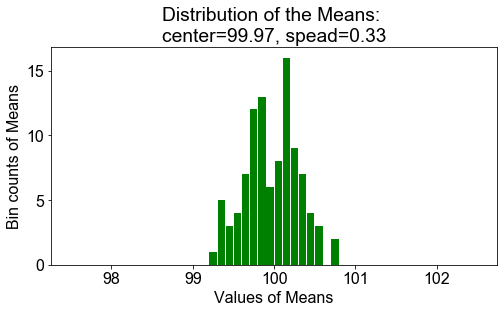

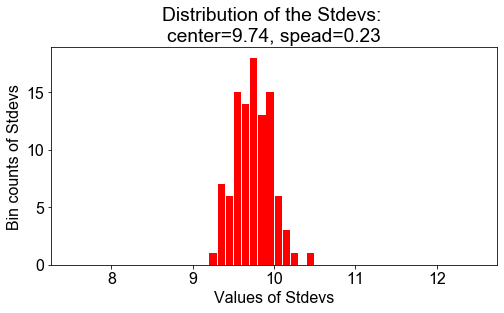

In [7]:
# Generate sample distribution and associated statistics
means, stdevs = get_sample_statistics(population, num_samples=100, num_pts=1000)

# Define the binning for the histograms
mean_bins = np.linspace(97.5, 102.5, 51)
std_bins = np.linspace(7.5, 12.5, 51)

# Plot the distribution of means, and the distribution of stdevs
fig = plot_hist(data=means, bins=mean_bins, data_name="Means", color='green')
fig = plot_hist(data=stdevs, bins=std_bins, data_name="Stdevs", color='red')

Notice you have to page through the plots to see both. Can you see the center and spread in the title and the plots? If you have not before, compute those values using e.g. ```means.mean()``` and ```means.std()``` to see that they match the figure.

## Model Estimation and Likelihood
- Likelihood vs Probability
    - Conditional Probability: $P(outcome A \vert given B)$
    - Probability: $P(data \vert model)$
    - Likelihood: $L(model \vert data)$

### Estimation of Population Parameters
Imagine a constellation ("population") of satellites orbiting for a full year, and the distance traveled in each hour is measured in kilometers. There is variation in the distances measured from hour-to-hour, due to unknown complications of orbital dynamics. Assume we cannot measure all the data for the year, but we wish to build a population model for the variations in orbital distance per hour (speed) based on a sample of measurements.

In this exercise, you will assume that the population of hourly distances are best modeled by a gaussian, and further assume that the parameters of that population model can be estimated from the sample statistics.

In [8]:
sample_distances = np.array([ 27143.88628178,  27087.98325817,  27580.04229165,  27113.1083337 ,
        27057.40721048,  26693.19226411,  26916.87962035,  27229.72020211,
        26755.77703262,  26994.32512326,  26863.90989702,  26885.76359407,
        27055.16802439,  26846.50278894,  26761.62724163,  27011.92714   ,
        27006.0414866 ,  27112.55543553,  27075.29318558,  27241.03510749,
        26886.05773059,  26853.25717425,  27356.50242839,  27083.71944651,
        27048.1317373 ,  26833.17214224,  27187.1114273 ,  26792.09492182,
        27327.65334315,  26905.32791217,  26965.08045969,  26781.97735558,
        27001.76307178,  26457.73102378,  27104.47241451,  27039.42276518,
        26984.93044729,  27015.64782321,  26734.91971513,  26917.33608426,
        27018.00056773,  26687.14839143,  27339.65512105,  26999.48176249,
        27232.23332988,  27055.67780598,  26558.44932455,  26853.1677454 ,
        26801.88222348,  26861.18523779,  26801.07982206,  27313.85177827,
        27028.90702211,  27134.47888438,  27184.32863559,  26655.06969382,
        26766.95785922,  27246.58734932,  26859.90997974,  26843.13093501,
        27453.13275985,  26873.41574937,  26878.4825768 ,  26822.42307365,
        26994.9099121 ,  26946.60404244,  26877.97718899,  26823.59522223,
        26901.05746475,  27042.79485155,  26678.05762212,  26815.86185253,
        26705.87521488,  27025.03575828,  26601.45264973,  27063.85095746,
        26873.54531063,  26962.82916206,  27075.37369548,  27084.79512368,
        26864.61856166,  27223.18632238,  26557.40113102,  26995.79204744,
        26917.01806731,  26749.54338877,  26600.2621505 ,  26919.74101142,
        27092.700555  ,  26977.8727147 ,  26849.13471473,  26524.28234783,
        26903.92055912,  26957.90186854,  27053.1976854 ,  27113.30038626,
        26833.69061488,  26980.32286769,  27457.87472776,  26607.4298234 ,
        27120.50297762,  26813.97549293,  27119.1785466 ,  26990.11041907,
        26753.55181914,  26525.20469951,  26842.72974227,  26973.67981323,
        26644.18669416,  27335.23537165,  26974.77143351,  27114.95839037,
        26858.96264682,  26835.49786595,  26531.37432824,  27126.72630558,
        26913.79981063,  26860.88065597,  27238.26729004,  26903.87271231,
        27513.09247822,  26548.8345489 ,  26999.26166747,  27057.7189009 ,
        26855.09506965,  26846.60168945,  26998.49380647,  26681.04629384,
        27053.79099607,  26496.07750486,  27036.1456002 ,  27016.92252596,
        26481.37833241,  27463.50952723,  26941.62131814,  26709.51469047,
        26566.83038974,  27183.90514637,  26857.18592379,  26890.57821981,
        27297.38075903,  27182.21187189,  27007.75242303,  26745.98219617,
        26604.88487869,  27265.42925406,  26966.86884722,  26737.8827    ,
        26861.68486165,  27100.295441  ,  27187.91639576,  27244.33375738,
        26785.46575254,  26596.83571684,  26634.24093179,  26977.26170876,
        26837.52656605,  27161.00628236,  26824.60504805,  26818.95578474,
        26933.79406034,  26746.69702688,  26992.12439671,  26594.40884625,
        27136.65457708,  27006.47774178,  27348.6312121 ,  26640.05169387,
        26714.48926311,  26976.750765  ,  26891.78137871,  27415.10567461,
        26863.34205649,  26864.13041363,  26933.87284308,  27240.9018238 ,
        26780.34584953,  27101.21398455,  26536.27695868,  27205.70198053,
        26766.53883905,  26828.57836298,  26995.50842643,  26714.33520856,
        26850.33271654,  27351.41721953,  26804.22626971,  26654.90293713,
        27304.44206032,  26847.36626491,  26804.55720083,  26829.07844477,
        26764.00163473,  27052.12291217,  26567.20279511,  26960.61254516,
        27065.57672416,  26744.10077992,  27314.71742361,  26663.42154431,
        26970.9819719 ,  26694.67840398,  26996.04004449,  26801.79974578,
        27061.01623074,  26937.19018333,  26857.45686715,  26593.49519935,
        26716.65215727,  27010.58406499,  27054.09857263,  26944.52372485,
        26878.21290192,  26989.57495373,  27096.37064746,  26716.88817842,
        26836.57256623,  27033.67598741,  26863.87803964,  27047.20798789,
        27034.91369359,  26685.87451072,  27039.83885243,  26791.89970318,
        26849.33668429,  27026.34834406,  26695.23683922,  26904.80471305,
        26436.85015118,  26830.81472121,  26911.67043354,  27404.79981318,
        26957.87969301,  27033.96423562,  26957.63539671,  26771.38920367,
        27258.24706918,  26968.81217189,  27199.03755538,  26961.52942659,
        26739.94237613,  27134.65276966,  26630.07179143,  26754.10986303,
        26734.2688266 ,  26955.89986361,  26980.93876681,  26780.9502099 ,
        26881.43697313,  26861.55370871,  26938.04451192,  27424.71030759,
        27224.90782133,  27567.66884372,  26942.45666815,  26666.49862448,
        26811.51215308,  26862.3358439 ,  26990.77460817,  26724.01040161,
        26716.03660602,  27089.57059653,  27089.43869505,  26738.7977659 ,
        26639.01975494,  26732.8054403 ,  27148.6025703 ,  26772.1406178 ,
        26823.98368548,  26944.55993598,  26899.06286655,  27274.75301706,
        26732.66097594,  27078.97928512,  27156.28365114,  26674.92376282,
        26591.16650517,  26901.28578514,  26854.2124564 ,  26637.76152564,
        27067.74816302,  26977.5439568 ,  26938.91884692,  27056.15166122,
        26905.21037053,  26887.87603461,  26618.12393823,  26842.1454847 ,
        27243.69949251,  27019.77978195,  27024.08660277,  26942.38510255,
        26855.35443262,  26486.76635941,  26514.29446274,  26886.15161863,
        26585.50047227,  26654.4768983 ,  26991.29015812,  27157.85397661,
        26933.96043703,  26890.65691518,  27238.72323288,  26805.130186  ,
        27125.58144028,  27327.70213603,  27171.75239724,  27093.72863873,
        26587.66972079,  26617.52797802,  26821.20198502,  26857.73533964,
        26635.38737764,  26661.90040372,  26829.5779198 ,  26741.62947342,
        27190.30556829,  26579.22864091,  27497.96834736,  27081.02355063,
        26769.52914657,  26985.74574184,  27595.80878556,  26487.11507164,
        27292.42142024,  26733.38001826,  26648.9204039 ,  27429.34320411,
        26843.95841763,  26892.15101573,  26822.53694383,  26475.39327269,
        26981.99259762,  26764.28248029,  27077.40025535,  26873.83834394,
        27194.15938715,  26953.27264372,  26964.84608336,  27080.18180957,
        26683.31744167,  26502.83895785,  26844.16395718,  27134.59783351,
        26990.62775284,  26922.07725332,  27190.05269203,  27065.33499104,
        27268.61508165,  26512.11430426,  26612.70415815,  26942.6117626 ,
        26785.98958143,  26879.59951891,  27074.25111081,  26638.0334235 ,
        26858.27340454,  27265.22585654,  26731.03040891,  26706.0906174 ,
        26881.98394737,  27076.9711286 ,  27072.06023771,  27172.94087273,
        26860.60951111,  26637.69630775,  26921.5832547 ,  26868.06131472,
        26600.09476209,  26660.55416077,  26615.43446626,  26834.83778753,
        27068.60120026,  26916.29208527,  26988.51212715,  26825.589366  ,
        27010.21997456,  26767.49717399,  26582.69461741,  26654.01298353,
        26878.09411344,  26842.16941808,  26769.71400851,  26793.55753181,
        26780.7725181 ,  26832.16520869,  26520.33080082,  26878.99396777,
        26626.28412691,  26836.54178272,  26747.54469582,  27325.33127661,
        27000.43140943,  26591.54085344,  27050.44515082,  26819.78852642,
        26768.79271964,  26623.20005054,  26499.24012889,  27034.55732796,
        26972.30548523,  27076.97833476,  27145.97653883,  27370.45045816,
        26788.54262976,  27185.12908371,  27105.10953604,  26633.87050673,
        26497.62446903,  26629.59429991,  27303.09765554,  27512.90634296,
        26979.4130203 ,  27288.31979692,  26775.90921763,  27246.3093449 ,
        26702.97967346,  27127.80327595,  26887.79015222,  26845.61680541,
        27325.07216057,  26912.04092278,  26698.64746013,  27069.89578735,
        26896.89216195,  26825.16825668,  26719.23253875,  27089.1351968 ,
        26907.17017392,  26615.46233873,  26647.44351774,  26882.2284668 ,
        26873.25430701,  27131.32632721,  26561.99089323,  26896.45048256,
        26779.47437051,  26866.97946212,  26580.68558289,  26866.31573419,
        26942.87693368,  26575.09935991,  26895.31801405,  26927.33675451,
        27097.5658296 ,  27128.16478439,  26405.45893621,  26994.71552069,
        27063.31273634,  26748.21332282,  26808.8932871 ,  26724.7750947 ,
        26886.51488927,  26505.51673261,  26998.04607751,  26816.22792519,
        26849.55072425,  26826.30312419,  27380.98648648,  27001.70154691,
        26945.59491929,  26892.01594966,  27008.94931909,  27216.56367404,
        26780.61753675,  27085.16847858,  27309.98648719,  27024.33210759,
        26696.51722235,  26885.77145915,  27091.30918844,  27288.44923661,
        26843.78490903,  26995.37811275,  27138.50850968,  27075.52853479,
        26788.01558595,  26686.5137108 ,  26907.76987956,  27043.41094828,
        27002.33688256,  27000.58628711,  26923.24546555,  26992.01623444,
        26839.18921918,  26876.01983098,  26824.33127226,  26670.56916053,
        27171.51413067,  26223.68323013,  27181.98404   ,  26803.87711263,
        27103.321864  ,  27095.93537004,  26770.49982931,  27057.20228503,
        27221.60761577,  27094.98258615,  27115.18560631,  26842.77894778,
        27323.4894849 ,  26881.86334618,  26837.51410218,  27130.37924233,
        26660.94358069,  26731.11198984,  26905.96625456,  26789.17451613,
        26934.47552903,  26695.9977087 ,  26951.91390559,  26930.80109208,
        26650.40867341,  27314.64800395,  26801.46760827,  27087.49867632,
        26630.66491592,  26918.4092305 ,  26953.25107897,  26717.30404149,
        26949.66946678,  26754.97063429,  26870.10207066,  26807.38876625,
        27107.55234701,  26601.59319672,  26821.24022814,  26685.63552257,
        27044.86820473,  27416.09728796,  26677.99084544,  26854.67530358,
        26786.93680732,  27010.23095439,  27232.56444479,  26887.24710797,
        26680.41523995,  26834.47744991,  27062.41793769,  26763.82670317,
        26935.17919968,  27100.28799049,  26698.32757744,  27198.96478924,
        26650.21345545,  26887.53157538,  26814.57686748,  26605.44529358,
        27215.91089759,  26685.02505006,  26807.00356023,  27183.35159978,
        27299.01025863,  26540.3273963 ,  27014.04664468,  27182.21812316,
        26767.58852115,  27009.07760766,  26723.04531565,  27017.79895826,
        26768.65088691,  26777.76464446,  26315.61040777,  27133.86367531,
        26918.66726152,  26853.81704745,  27347.05391   ,  26766.18432387,
        26960.80182685,  26988.449127  ,  26876.66140718,  26939.05893723,
        26982.01789116,  26919.20819375,  26747.81346849,  26717.85402756,
        26739.96859867,  27046.28760018,  26679.84821861,  26675.41876112,
        26896.86351377,  26834.36394749,  27025.01206036,  26832.62404834,
        26796.37376438,  26722.27745533,  26604.57505423,  26874.84134077,
        26709.89006538,  26647.86223725,  27365.60478048,  27250.48206328,
        26943.0014568 ,  26681.2406666 ,  26908.14576762,  26768.46801898,
        26704.72233385,  27395.07225842,  26555.49997708,  26920.70572279,
        26787.9513203 ,  26621.50935879,  27023.69869608,  26983.26169904,
        27051.78206884,  26924.32570734,  27221.81159283,  27041.46242069,
        26893.2471373 ,  26620.10418654,  26803.4755538 ,  27110.75619235,
        26971.28591253,  27004.02059281,  26482.00284554,  26667.06080455,
        26796.77272328,  27053.93552085,  26917.11701927,  26742.88375437,
        26597.94705253,  26947.42274881,  26702.75921747,  26960.44887525,
        27066.83062975,  26638.57233818,  26636.88207672,  27326.19853941,
        26900.83561322,  26931.97729053,  26599.46245532,  27348.70514627,
        26950.12066067,  26695.35062517,  26729.06808538,  26998.34292279,
        27019.78429031,  26763.23333842,  27147.21522235,  26754.26076967,
        26655.98520353,  27086.3651111 ,  26652.40607143,  27091.7757577 ,
        27062.96184973,  27105.95015082,  26792.60176359,  27127.00319873,
        27050.079599  ,  26845.32238507,  27226.1787699 ,  26931.21354275,
        26680.03663918,  26945.87861519,  27201.82207787,  26941.14577377,
        26893.08110167,  26805.7467604 ,  27194.65948651,  26793.96677552,
        27206.19599613,  27224.62796493,  26875.27332831,  27283.97611498,
        26983.48649331,  27219.68903172,  27052.57102147,  26933.15409584,
        27139.31217806,  26976.22048026,  26774.99891765,  26942.74073873,
        27038.3178845 ,  27087.09341814,  26995.69255902,  26946.14042527,
        26903.47898471,  26733.12804219,  27300.39468856,  27033.12914345,
        27234.96606573,  27323.80585794,  27321.96344636,  26843.46999031,
        26674.17193316,  26972.83513715,  27146.64170615,  26489.85474017,
        27210.57478495,  27165.28016939,  27195.45813929,  26727.86490468,
        27104.78719821,  27051.34953546,  26836.93814066,  26592.54776213,
        26703.80227206,  26855.44832291,  26593.15487319,  26671.55142006,
        27236.79514512,  27169.13090286,  27250.99331408,  26833.65624651,
        26943.85545535,  26832.80716137,  26777.88560215,  26914.76627881,
        27097.62559952,  26963.72096872,  26797.53748958,  26941.24868294,
        26658.10570875,  26719.42705881,  27128.30406468,  27038.41144606,
        26989.98023337,  26780.44553277,  26643.26778624,  27122.50113836,
        26820.2468365 ,  26743.371561  ,  26625.22120759,  26910.22885212,
        26676.67434759,  26931.08841229,  27028.30751521,  26715.73606702,
        27097.83048853,  26752.17630407,  26671.09756155,  26755.26600278,
        26370.7931108 ,  26928.53647969,  27075.80042784,  26578.35985294,
        27002.0644265 ,  27019.44718263,  26924.43204291,  27396.64607862,
        27166.88130204,  26738.05290813,  26911.29195765,  26870.85296559,
        26996.29539281,  27051.67225526,  26675.14343869,  26936.77477091,
        26994.14449431,  26636.99318269,  26754.42383871,  26852.07254784,
        27023.25751189,  27078.57722094,  26665.21185785,  27378.73907689,
        26990.43019433,  27042.00311502,  26535.25252992,  27217.66345914,
        26864.36032814,  26728.99675236,  26810.25495155,  27081.33425362,
        26610.70127851,  26750.27968439,  26660.33556415,  26502.09070115,
        26759.74644598,  26331.88707073,  26953.62290489,  27225.54555162,
        26803.85604939,  27015.80260236,  27063.97236074,  27385.62714809,
        27314.66456811,  26605.24572727,  27196.06336614,  26540.36402604,
        26714.60999015,  27070.9127378 ,  26624.93717501,  26768.40846424,
        26654.76203627,  26499.09780301,  26631.22707081,  26920.58225453,
        26877.40880054,  27082.2237341 ,  26827.86981599,  27183.80817945,
        27254.65759647,  26986.3498665 ,  26891.20102975,  26772.17730581,
        27022.56291652,  27222.27181425,  27032.95585834,  26425.61520155,
        26990.75731642,  27025.2380441 ,  27350.73641571,  26586.64903611,
        26649.97317418,  27111.79872903,  26925.84914513,  26846.22885122,
        27101.85249399,  26902.73954691,  26984.05823343,  27023.62942578,
        27034.21271529,  27017.04554648,  26768.6557724 ,  26518.5160293 ,
        26836.093973  ,  27304.38452298,  27475.42373782,  26828.68336861,
        26861.25909624,  26845.25731839,  26656.6082006 ,  27407.50248621,
        27059.52042785,  26616.03753249,  26557.44125806,  26943.8869675 ,
        26898.74692024,  26994.91799687,  27083.65141568,  27085.82309686,
        26841.77912625,  27103.62403982,  27343.12373789,  26845.49505206,
        26532.02269793,  27032.98876105,  27053.56903534,  27411.25022777,
        27029.58842804,  26929.58851687,  26818.69960195,  27306.97990886,
        26495.64048647,  26792.38926062,  26833.75249299,  26909.81195161,
        27208.8970663 ,  26952.93021651,  27031.57025867,  26887.10128666,
        26771.66893823,  26523.07005484,  27362.29681554,  26927.53837938,
        26917.88028539,  26900.10269084,  27240.5227911 ,  27081.44638233,
        26677.93446405,  26917.97260646,  26836.60271979,  26461.22083287,
        27281.22945966,  27273.74150261,  26976.44476805,  26875.84043766,
        27106.3293943 ,  26799.52335095,  27007.24644262,  26665.16966301,
        27304.18394391,  27274.59688309,  26698.09233131,  26791.34443134,
        26933.52542265,  27092.15719432,  27459.08034851,  26978.15558848,
        26720.64676711,  27305.78954085,  26858.61814665,  26297.59172422,
        26943.93494132,  26793.18115764,  26675.93582648,  27329.56087595,
        26623.85064432,  26954.93895181,  27006.99634429,  26972.19643487,
        26548.91205334,  26700.5882683 ,  27218.44546661,  26653.55229226,
        26677.28514474,  26748.3959728 ,  26915.79737455,  27158.97192811,
        27290.58173574,  27086.98581331,  27006.43260782,  27106.01510998,
        26701.22838215,  26578.52101416,  26722.69176413,  27027.26101764,
        26762.08980586,  27096.09446463,  26943.22569795,  26505.59147123,
        26863.34213189,  26494.20132514,  26753.72611516,  26778.60980042,
        27008.33743502,  26985.91717751,  26615.82439677,  26866.19639427,
        27206.61338108,  26607.41840873,  26832.85939927,  26838.13637565,
        26850.27608958,  26713.03256229,  27093.70907553,  26728.60490451,
        26721.61336247,  26856.95405826,  26780.65391093,  27152.90060359,
        27065.71310498,  26868.56348521,  26870.46747994,  27160.40631194,
        26603.45129763,  27164.29835919,  27050.25504941,  27038.57219125,
        27114.21399491,  27015.82602835,  26782.83405673,  27119.42172252,
        27207.79904991,  27087.54947541,  26697.06522995,  27025.00358675,
        27463.94277955,  27439.92924195,  26758.2418425 ,  27170.83196079,
        27004.1265311 ,  26973.39457052,  26824.44913799,  26887.24803323,
        26540.11143709,  26977.01335687,  27026.48820243,  26876.57197134,
        26961.04725683,  26774.41004752,  27028.82952681,  26884.38731073,
        26917.86490144,  27221.46739035,  26567.3547064 ,  27437.83066131,
        27007.37053409,  26934.79679098,  26828.67647402,  26918.02157083,
        27102.91594912,  26926.21346822,  26703.24071232,  26752.40561732,
        26910.72499058,  27073.01916917,  26714.79735407,  27113.196917  ,
        26925.71162521,  27427.67784218,  27051.8207997 ,  26884.4680432 ,
        26856.70934044,  27114.99783882,  26937.11394529,  26952.30554279,
        26733.23494685,  27091.61448119,  27192.92226796,  27068.805274  ,
        26347.87498413,  27106.86164021,  26970.13665055,  26279.50028187,
        26497.08684322,  27254.38245243,  26942.48399784,  26898.40060351])

In [13]:
def gaussian_model(x, mu, sigma):
    return 1/(np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

def plot_data_and_model(data, model, opt_sort=False):
    data_bins = np.linspace(np.min(data), np.max(data), 21)
    data_opts = dict(rwidth=0.8, color='black', alpha=0.25)
    model_opts = dict(linewidth=4, color='red', alpha=0.5, linestyle=' ', marker="." )
    if opt_sort:
        # Note: Critical thing students get wrong a LOT!
        # By default, we turn off linestyle, which connects-the-dots in order
        # This is bad here, because the data and model are not sorted in order of increasing distance
        # Sorting only the data or only the model, by size, will break everything,
        # since the model and data are connected point-by-point, they both must be sorted together
        # Here we sort by data (distance)
        sort_indices = np.argsort(data)
        data = data[sort_indices]
        model = model[sort_indices]
        model_opts = dict(linewidth=4, color='red', alpha=0.5, linestyle='-', marker="." )
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(12,8))
    count, bins, patches = axis.hist(data, data_bins, density=True, cumulative=False, label='data', **data_opts)
    line = axis.plot(data, model, label='model', **model_opts)
    axis.grid()
    axis.set_ylabel("Population vs Sample")
    axis.set_xlabel("Distance")
    axis.legend()
    # title = axis.set_title('Guassian model, mu = {:0.1f}, sigma = {:0.1f}'.format(mu, sigma))
    title = axis.set_title('Data and Model')
    fig.tight_layout()
    plt.show()
    return fig

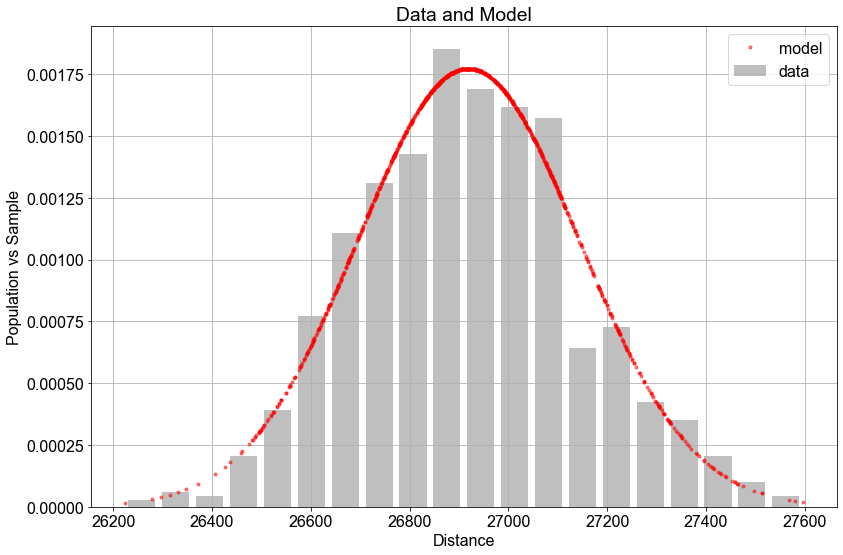

In [14]:
# Compute the mean and standard deviation of the sample_distances
sample_mean = np.mean(sample_distances)
sample_stdev = np.std(sample_distances)

# Use the sample mean and stdev as estimates of the population model parameters mu and sigma
population_model = gaussian_model(sample_distances, mu=sample_mean, sigma=sample_stdev)

# Plot the model and data to see how they compare
fig = plot_data_and_model(sample_distances, population_model)

Notice in the plot that the data and the model do not line up exactly. This is to be expected because the sample is just a subset of the population, and any model built from it cannot be a prefect representation of the population. Also notice the vertical axis: it shows the normalize data bin counts, and the probability density of the model. Think of that as probability-per-bin, so that if summed all the bins, the total would be 1.0.

### Maximizing Likelihood, Part 1
Previously, we chose the sample mean as an estimate of the population model paramter mu. But how do we know that the sample mean is the best estimator? This is tricky, so let's do it in two parts.

In Part 1, you will use a computational approach to compute the log-likelihood of a given estimate. Then, in Part 2, we will see that when you compute the log-likelihood for many possible guess values of the estimate, one guess will result in the maximum likelihood.

In [15]:
# Compute sample mean and stdev, for use as model parameter value guesses
mu_guess = np.mean(sample_distances)
sigma_guess = np.std(sample_distances)

# For each sample distance, compute the probability modeled by the parameter guesses
probs = np.zeros(len(sample_distances))
for n, distance in enumerate(sample_distances):
    probs[n] = gaussian_model(distance, mu=mu_guess, sigma=sigma_guess)

# Compute and print the log-likelihood as the sum() of the log() of the probabilities
loglikelihood = np.sum(np.log(probs))
print('For guesses mu={:0.2f} and sigma={:0.2f}, the loglikelihood={:0.2f}'.format(mu_guess, 
                                                                                   sigma_guess, 
                                                                                   loglikelihood))

For guesses mu=26918.39 and sigma=224.99, the loglikelihood=-6834.98


Although the likelihood (the product of the probabilities) is easier to interpret, the loglikelihood has better numerical properties. Products of small and large numbers can cause numerical artifacts, but sum of the logs usually doesnt suffer those same artifacts, and the "sum(log(things))" is closely related to the "product(things)"

### Maximizing Likelihood, Part 2
In Part 1, you computed a single log-likelihood for a single mu. In this Part 2, you will apply the predefined function ```compute_loglikelihood()``` to compute an array of log-likelihood values, one for each element in an array of possible mu values.

The goal then is to determine which single mu guess leads to the single maximum value of the loglikelihood array.

In [16]:
def compute_loglikelihood(samples, mu, sigma=250):
    probs = np.zeros(len(samples))
    for n, sample in enumerate(samples):
        probs[n] = gaussian_model(sample, mu, sigma)
    loglikelihood = np.sum(np.log(probs))
    return loglikelihood

def plot_loglikelihoods(mu_guesses, loglikelihoods):
    max_loglikelihood = np.max(loglikelihoods)
    max_index = np.where(loglikelihoods==max_loglikelihood)
    max_guess = mu_guesses[max_index][0]
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(10,6))
    axis.plot(mu_guesses, loglikelihoods)
    axis.plot(max_guess, max_loglikelihood, marker="o", color="red")
    axis.grid()
    axis.set_ylabel('Log Likelihoods')
    axis.set_xlabel('Guesses for Mu')
    axis.set_title('Max Log Likelihood = {:0.1f} \n was found at Mu = {:0.1f}'.format(max_loglikelihood, 
                                                                                      max_guess))
    fig.tight_layout()
    plt.show()
    return fig

In [17]:
sample_mean = 26918.392414058031
sample_stdev = 224.9870886426813

Maximum loglikelihood found for best mu guess=[26918.39241406]


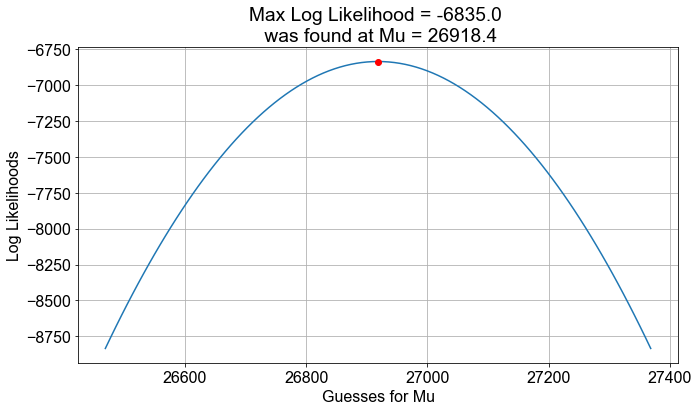

In [19]:
# Create an array of mu guesses, centered on sample_mean, spread out +/- by sample_stdev
low_guess = sample_mean - 2*sample_stdev
high_guess = sample_mean + 2*sample_stdev
mu_guesses = np.linspace(low_guess, high_guess, 101)

# Compute the loglikelihood for each model created from each guess value
loglikelihoods = np.zeros(len(mu_guesses))
for n, mu_guess in enumerate(mu_guesses):
    loglikelihoods[n] = compute_loglikelihood(sample_distances, mu=mu_guess, sigma=sample_stdev)

# Find the best guess by using logical indexing, the print and plot the result
best_mu = mu_guesses[loglikelihoods==np.max(loglikelihoods)]
print('Maximum loglikelihood found for best mu guess={}'.format(best_mu))
fig = plot_loglikelihoods(mu_guesses, loglikelihoods)

Notice that the guess for mu that gave the maximum likelihood is precisely the same value as the ```sample.mean()```. The ```sample_mean``` is thus said to be the "Maximum Likelihood Estimator" of the population mean mu. We call that value of mu the "Maximum Likelihood Estimator" of the population mu because, of all the mu values tested, it results in a model population with the greatest likelihood of producing the sample data we have.

## Model Uncertainty and Sample Distributions


### Bootstrap and Standard Error
Imagine a National Park where park rangers hike each day as part of maintaining the park trails. They don't always take the same path, but they do record their final distance and time. We'd like to build a statistical model of the variations in daily distance traveled from a limited sample of data from one ranger.

Your goal is to use bootstrap resampling, computing one mean for each resample, to create a distribution of means, and then compute standard error as a way to quantify the "uncertainty" in the sample statistic as an estimator for the population statistic.

In [22]:
#hide
sample_data = np.array([ -2.56528602e-01,   1.33537708e+00,   3.10605971e+00,
        -3.88306749e-01,  -3.68273914e-01,   3.27842563e+00,
         1.67486946e+00,  -7.78948772e-01,   1.26512009e+00,
        -7.26835386e-01,  -7.11459507e-01,   7.23924543e-01,
        -3.56656049e+00,  -3.16983567e+00,  -8.24575058e-01,
        -1.70566224e+00,   9.68494665e-01,  -1.45604815e+00,
        -2.44460740e+00,   3.33129754e+00,  -3.15526010e-02,
         5.75056409e-01,  -2.38949637e+00,  -6.08765449e-01,
         7.21845179e-01,  -1.78198715e+00,   1.29139604e+00,
        -6.41277380e-01,  -3.38749959e-03,  -6.03413224e-01,
         4.32455637e+00,   6.13005551e-01,  -1.45542186e+00,
         2.32508982e+00,  -1.74168730e+00,   1.13772719e+00,
        -3.17934025e+00,  -1.89637210e+00,   1.17372247e+00,
         2.27693316e+00,   1.16273656e+00,   6.08703435e-01,
         2.57792609e-01,  -2.07704398e+00,  -5.39688417e-01,
        -1.27754192e-03,   3.05424445e+00,   1.64723658e+00,
        -2.54608031e+00,   1.64816794e+00,   2.49835439e-01,
        -3.13844001e-01,   2.28335258e+00,   3.14199904e+00,
         2.96256024e+00,  -5.58435046e-01,   5.21575248e-01,
         1.82252686e+00,   3.13109025e+00,   2.41651524e-01,
         8.48682047e-01,  -9.72669948e-01,  -1.13241325e+00,
         2.90505164e+00,   4.01248006e+00,   1.17597976e+00,
         3.34706580e+00,   2.08327205e+00,   8.97604908e-02,
         2.12279121e+00,   4.49607313e+00,   1.36834792e+00,
         4.58928731e+00,  -3.75949021e+00,   3.14380501e+00,
         1.69409414e+00,   9.41985299e-01,   1.74352155e+00,
        -2.39513783e+00,   1.16065622e+00,   2.33422514e+00,
         4.59578809e+00,   6.23459563e-01,   6.30127942e-02,
         6.96485913e-01,   3.55080424e+00,   2.39750222e+00,
         7.00479592e-01,   2.80653487e+00,   1.99415510e+00,
         3.75728998e+00,   4.35893812e-01,   1.20467571e+00,
         1.09578369e+00,  -1.02702990e+00,   2.51224055e+00,
         2.46211054e+00,   1.97022691e+00,   1.51082573e+00,
        -8.30741484e-01,   1.17870935e+00,   1.35457097e+00,
         4.55445462e-01,   1.75742858e+00,   2.90810171e+00,
         5.89237180e+00,   2.48915563e+00,   2.67510078e+00,
         2.03110817e+00,  -1.63754243e+00,   2.16697225e+00,
         2.36046042e+00,   7.18648422e+00,   1.89527807e+00,
         2.90309468e+00,   2.25057646e+00,   2.64392476e-03,
         4.64564563e+00,   3.88386607e+00,   3.98206389e+00,
         6.01225090e-01,   5.24558862e+00,  -3.43702126e-01,
         3.65371419e+00,   6.88091125e+00,   5.38927350e-01,
         1.40740454e+00,   2.75930273e+00,   1.57304869e+00,
        -5.01326862e-01,   2.75712595e+00,   5.15392573e-01,
         3.60718486e+00,   8.41151532e-01,   5.79986881e+00,
         1.15349342e+00,   2.09587697e+00,   4.38703443e+00,
         3.18271367e-01,   3.25491987e+00,   5.43428551e+00,
        -3.74966469e-01,   3.22926772e+00,   3.39976559e+00,
         4.46364574e+00,   4.46098578e-01,   2.99086774e-01,
         4.00388313e+00,   3.57396935e+00,   3.50098570e+00,
         3.71289642e+00,   1.67995056e+00,   3.52450739e+00,
         3.66614495e+00,   1.67129716e+00,   6.85154902e+00,
         4.08766584e+00,   7.77393006e-01,   4.49310722e+00,
         1.25063666e+00,   4.79416921e+00,   5.55719116e+00,
         1.61863536e+00,   5.20675226e+00,   4.12556185e+00,
         4.96412032e+00,   7.13358597e+00,   2.86922377e+00,
         1.87252767e+00,   1.62097114e+00,   1.78837943e+00,
         3.28579658e+00,   4.14230395e+00,   4.03338160e+00,
         5.15436650e+00,   3.54600378e+00,   6.44706815e+00,
         3.03068633e+00,   9.02033833e+00,   4.85133470e+00,
         1.90568489e+00,   1.49821500e+00,   4.62494483e+00,
         3.23307443e+00,   5.12800099e+00,   4.66647525e+00,
         3.59434217e+00,   2.06641256e+00,   7.50305551e-01,
         2.90697010e+00,   5.53279759e+00,   4.26818749e+00,
         1.36852244e+00,   4.22636185e+00,   4.67063476e+00,
         2.15228513e+00,   4.24745021e+00,   4.07641744e+00,
         1.69405940e+00,   4.71557472e+00,   5.14156905e+00,
         6.20610249e+00,   6.16760410e+00,   1.32466126e+00,
         2.22434992e+00,   5.15007053e+00,   5.16757190e+00,
         5.19009537e+00,   1.18854630e+01,   5.34178102e+00,
         6.49113128e+00,   6.14800353e+00,   5.56278250e+00,
         3.64946151e+00,   5.81793844e+00,   2.77434957e+00,
         3.86636279e+00,   3.38927290e+00,   4.54374828e+00,
         9.02931713e+00,   6.85469615e-01,   5.81252038e+00,
         1.23456826e+00,   3.53613627e+00,   6.67790119e+00,
         4.64856004e+00,   2.38451044e+00,   3.12939258e+00,
         5.93919550e+00,   3.13926674e+00,   5.05291718e+00,
         4.73114368e+00,   3.35679930e+00,   8.96788818e+00,
         5.96783804e+00,   6.69714827e-01,   5.11290863e+00,
         3.43642707e+00,   6.48486667e+00,   3.21495852e+00,
         4.59052712e+00,   5.84997456e+00,   6.59151039e+00,
         2.47940719e+00,   4.23099753e+00,   3.97010938e+00,
         3.63334153e+00,   8.49090848e+00,   5.78996342e+00,
         2.47823209e+00,   6.85572389e+00,   9.28431239e+00,
         7.12493052e+00,   2.04126007e+00,   4.13153185e+00,
         7.65382230e+00,   3.72466107e+00,   6.04763886e+00,
         6.72926811e+00,   3.34613906e+00,   5.10094929e+00,
        -1.24253468e+00,   3.21122472e+00,   4.77486370e+00,
         2.80443364e+00,   8.58482261e+00,   2.47971724e+00,
         4.47991103e+00,   5.64148115e+00,   8.28254658e+00,
         2.54827570e+00,   7.76632750e+00,   5.48046612e+00,
         3.51698270e+00,   6.42420695e+00,   5.91811939e+00,
         4.33956625e+00,   5.69960417e+00,   4.80937281e+00,
         5.82703469e+00,   6.94426135e+00,   8.81203363e+00,
         3.18436900e+00,   9.94606675e+00,   1.79582440e+00,
         5.41642981e+00,   6.91663441e+00,   6.32198374e+00,
         4.53460096e+00,   5.38375550e+00,   4.83399813e+00,
         4.66127049e+00,   7.55920419e+00,   6.59403097e+00,
         4.51418081e+00,   7.71919975e+00,   6.55459904e+00,
         7.58572424e+00,   7.23925768e+00,   4.34200998e+00,
         4.89963792e+00,   7.53458721e+00,   7.28074053e+00,
         6.03819681e+00,   6.33465477e+00,   8.67532979e+00,
         4.95685722e+00,   7.25419476e+00,   5.77561470e+00,
         5.76463759e+00,   8.41755370e+00,   7.89083270e+00,
         7.88701927e+00,   8.89095761e+00,   6.34200768e+00,
         7.68390594e+00,   5.71946649e+00,   7.00833270e+00,
         6.11971389e+00,   6.59399193e+00,   7.61031405e+00,
         4.80355863e+00,   1.06447746e+01,   4.46796524e+00,
         4.07162277e+00,   8.83622175e+00,   8.12332539e+00,
         7.80823963e+00,   7.83669102e+00,   6.57550645e+00,
         4.82549126e+00,   6.79160912e+00,   5.30567658e+00,
         8.63023947e+00,   6.40588524e+00,   5.06900561e+00,
         6.09722832e+00,   7.58586291e+00,   5.65255089e+00,
         5.15555921e+00,   7.30737442e+00,   7.32993314e+00,
         5.84611365e+00,   5.93792339e+00,   7.36409987e+00,
         4.02383132e+00,   4.12507245e+00,   5.52311156e+00,
         6.55310570e+00,   7.62181513e+00,   9.97071243e+00,
         8.75531925e+00,   6.74012294e+00,   7.04196758e+00,
         5.09494127e+00,   7.08297373e+00,   6.56268272e+00,
         7.80543712e+00,   5.52553811e+00,   8.23869303e+00,
         1.02854778e+01,   7.02247970e+00,   8.06342344e+00,
         8.66028798e+00,   6.49755906e+00,   7.76818496e+00,
         7.36518480e+00,   7.55535220e+00,   5.83398043e+00,
         7.44902035e+00,   8.41599658e+00,   1.03422872e+01,
         9.37854165e+00,   1.17863649e+01,   5.96530487e+00,
         9.26464127e+00,   7.90668401e+00,   1.19396059e+01,
         5.96340343e+00,   5.92055632e+00,   6.42121471e+00,
         3.39220855e+00,   6.60848996e+00,   6.16173468e+00,
         8.00078757e+00,   8.40351195e+00,   1.14923417e+01,
         9.66084768e+00,   6.62619269e+00,   6.00317066e+00,
         8.80383834e+00,   5.19953359e+00,   1.15229175e+01,
         1.02388802e+01,   6.96164870e+00,   4.49373094e+00,
         1.06477447e+01,   7.73092031e+00,   1.04556326e+01,
         4.81114468e+00,   6.82124995e+00,   8.05048740e+00,
         8.15396119e+00,   7.17986906e+00,   9.34569986e+00,
         5.98475914e+00,   7.85524103e+00,   8.40059126e+00,
         9.20887767e+00,   9.62322976e+00,   5.97071582e+00,
         5.17177166e+00,   1.08153536e+01,   8.94462802e+00,
         6.80302693e+00,   1.14223040e+01,   8.57134927e+00,
         1.07185944e+01,   8.51503696e+00,   1.25214958e+01,
         1.19306817e+01,   7.94207170e+00,   1.04031419e+01,
         9.77075190e+00,   1.12372631e+01,   6.59015308e+00,
         9.91210292e+00,   1.06768490e+01,   5.06252103e+00,
         6.23348297e+00,   4.54153564e+00,   8.10118633e+00,
         1.00950845e+01,   1.16847141e+01,   8.84818956e+00,
         1.19772311e+01,   5.97979708e+00,   5.35323512e+00,
         8.66890460e+00,   9.56813090e+00,   8.75461050e+00,
         4.70511580e+00,   8.68175992e+00,   6.27106100e+00,
         1.02393451e+01,   9.65319649e+00,   7.06024043e+00,
         7.93226617e+00,   6.86157296e+00,   8.87464181e+00,
         1.09302846e+01,   7.06854791e+00,   1.00680930e+01,
         8.01948476e+00,   7.51425434e+00,   8.90593928e+00,
         7.06951536e+00,   8.05270139e+00,   6.78424421e+00,
         1.31294503e+01,   9.29052710e+00,   7.84054898e+00,
         9.68795982e+00,   9.05534390e+00,   8.85806080e+00,
         1.05483334e+01,   1.08550154e+01,   8.29899770e+00,
         8.22836352e+00,   8.84989661e+00,   4.81615767e+00,
         6.40961788e+00,   1.21937485e+01,   1.27699354e+01,
         9.00192792e+00,   1.06731139e+01,   1.01625003e+01,
         1.57177616e+01,   1.18191498e+01,   9.34416482e+00,
         7.70891912e+00,   6.42710736e+00,   1.00669273e+01,
         8.16729851e+00,   6.85549258e+00,   8.42685423e+00,
         7.57690399e+00,   1.31342833e+01,   1.15432795e+01,
         9.78405472e+00,   1.27798883e+01,   9.99473662e+00,
         8.13743160e+00,   1.29262482e+01,   1.09778201e+01,
         7.84550769e+00,   9.55932264e+00,   8.20876349e+00,
         7.21440054e+00])

In [23]:
def plot_data_hist(y):
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(10,6))
    data_opts = dict(rwidth=0.8, color='blue', alpha=0.5)
    bin_range = np.max(y) - np.min(y)
    bin_edges = np.linspace(np.min(y), np.max(y), 21)
    plt.hist(y, bins=bin_edges, **data_opts)
    axis.set_xlim(np.min(y) - 0.5*bin_range, np.max(y) + 0.5*bin_range)
    axis.grid("on")
    axis.set_ylabel("Resample Counts per Bin")
    axis.set_xlabel("Resample Means")
    axis.set_title("Resample Count = {}, \nMean = {:0.2f}, Std Error = {:0.2f}".format(len(y), 
                                                                                       np.mean(y), 
                                                                                       np.std(y)))
    fig.tight_layout()
    plt.show()
    return fig

In [28]:
num_resamples = 100
resample_size = 500
bootstrap_means = np.zeros(num_resamples)

Bootstrap Distribution: center=5.0, spread=0.1


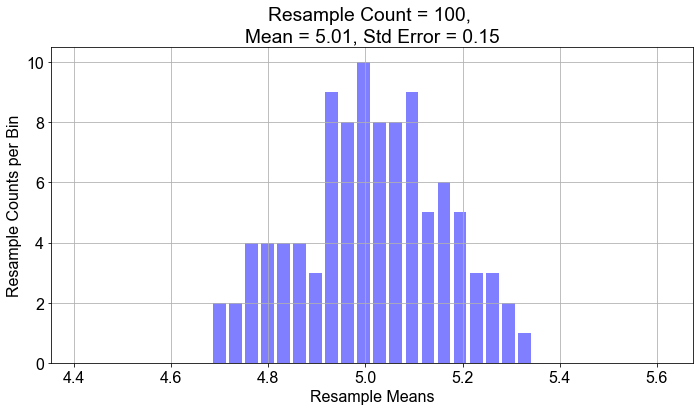

In [29]:
# Use the sample_data as a model for the population
population_model = sample_data

# Resample the population_model 100 times, computing the mean each sample
for nr in range(num_resamples):
    bootstrap_sample = np.random.choice(population_model, size=resample_size, replace=True)
    bootstrap_means[nr] = np.mean(bootstrap_sample)

# Compute and print the mean, stdev of the resample distribution of means
distribution_mean = np.mean(bootstrap_means)
standard_error = np.std(bootstrap_means)
print('Bootstrap Distribution: center={:0.1f}, spread={:0.1f}'.format(distribution_mean, standard_error))

# Plot the bootstrap resample distribution of means
fig = plot_data_hist(bootstrap_means)

Notice that standard_error is just one measure of spread of the distribution of bootstrap resample means. You could have computed the confidence_interval using ```np.percentile(bootstrap_means, 0.95)``` and ```np.percentile(bootstrap_means, 0.05)``` to find the range distance values containing the inner 90% of the distribution of means.

### Estimating Speed and Confidence
Let's continue looking at the National Park hiking data. Notice that some distances are negative because they walked in the opposite direction from the trail head; the data are messy so let's just focus on the overall trend.

In this exercise, you goal is to use boot-strap resampling to find the distribution of speed values for a linear model, and then from that distribution, compute the best estimate for the speed and the 90th percent confidence interval of that estimate. The speed here is the slope parameter from the linear regression model to fit distance as a function of time.

In [30]:
def least_squares(x, y):
    x_mean = np.sum(x)/len(x)
    y_mean = np.sum(y)/len(y)
    x_dev = x - x_mean
    y_dev = y - y_mean
    a1 = np.sum(x_dev * y_dev) / np.sum( np.square(x_dev) )
    a0 = y_mean - (a1 * x_mean)
    return a0, a1

In [46]:
distances = pd.read_csv('./dataset/distances.csv', index_col=0).to_numpy()
times = pd.read_csv('./dataset/times.csv', index_col=0).to_numpy()
resample_speeds = np.zeros(num_resamples)

In [47]:
# Resample each preloaded population, and compute speed distribution
population_inds = np.arange(0, 99, dtype=int)
for nr in range(num_resamples):
    sample_inds = np.random.choice(population_inds, size=100, replace=True)
    sample_inds.sort()
    sample_distances = distances[sample_inds]
    sample_times = times[sample_inds]
    a0, a1 = least_squares(sample_times, sample_distances)
    resample_speeds[nr] = a1

# Compute effect size and confidence interval, and print
speed_estimate = np.mean(resample_speeds)
ci_90 = np.percentile(resample_speeds, [5, 95])
print('Speed Estimate = {:0.2f}, 90% Confidence Interval: {:0.2f}, {:0.2f} '.format(speed_estimate,
                                                                                    ci_90[0],
                                                                                    ci_90[1]))

Speed Estimate = 2.04, 90% Confidence Interval: 1.10, 2.95 


 Notice that the speed estimate (the mean) falls inside the confidence interval (the 5th and 95th percentiles). Moreover, notice if you computed the standard error, it would also fit inside the confidence interval. Think of the standard error here as the 'one sigma' confidence interval. Note that this should be very similar to the summary output of a statsmodels ols() linear regression model, but here you can compute arbitrary percentiles because you have the entire speeds distribution.

### Visualize the Bootstrap
Continuing where we left off earlier in this lesson, let's visualize the bootstrap distribution of speeds estimated using bootstrap resampling, where we computed a least-squares fit to the slope for every sample to test the variation or uncertainty in our slope estimation.

In [48]:
def compute_resample_speeds(distances, times):
    num_resamples = 1000
    population_inds = np.arange(0, 99, dtype=int)
    resample_speeds = np.zeros(num_resamples)
    for nr in range(num_resamples):
        sample_inds = np.random.choice(population_inds, size=100, replace=True)
        sample_inds.sort()
        sample_distances = distances[sample_inds]
        sample_times = times[sample_inds]
        a0, a1 = least_squares(sample_times, sample_distances)
        resample_speeds[nr] = a1
        
    return resample_speeds

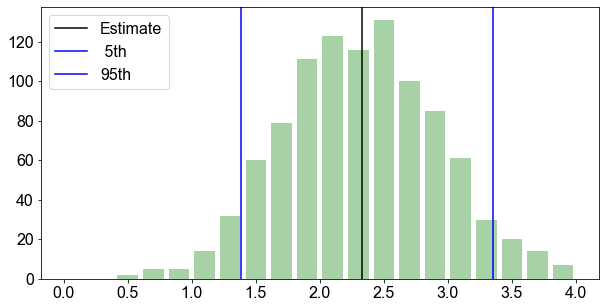

In [49]:
# Create the bootstrap distribution of speeds
resample_speeds = compute_resample_speeds(distances, times)
speed_estimate = np.mean(resample_speeds)
percentiles = np.percentile(resample_speeds, [5, 95])

# Plot the histogram with the estimate and confidence interval
fig, axis = plt.subplots()
hist_bin_edges = np.linspace(0.0, 4.0, 21)
axis.hist(resample_speeds, bins=hist_bin_edges, color='green', alpha=0.35, rwidth=0.8)
axis.axvline(speed_estimate, label='Estimate', color='black')
axis.axvline(percentiles[0], label=' 5th', color='blue')
axis.axvline(percentiles[1], label='95th', color='blue')
axis.legend()
plt.show()

 Notice that vertical lines marking the 5th (left) and 95th (right) percentiles mark the extent of the confidence interval, while the speed estimate (center line) is the mean of the distribution and falls between them. Note the speed estimate is the mean, not the median, which would be 50% percentile.

## Model Errors and Randomness
- Types of Errors
    - Measurement error
        - Broken sensor, wrongly recorded measurement
    - Sampling bias
        - temperature only from august, when days are hottest
    - Random chance
- Null Hypothesis
    - qustion: Is our effect due a relationship or due to random chance
    - answer: check the null hypothesis

### Test Statistics and Effect Size
How can we explore linear relationships with bootstrap resampling? Back to the trail! For each hike plotted as one point, we can see that there is a linear relationship between total distance traveled and time elapsed. It we treat the distance traveled as an "effect" of time elapsed, then we can explore the underlying connection between linear regression and statistical inference.

In this exercise, you will separate the data into two populations, or "categories": early times and late times. Then you will look at the differences between the total distance traveled within each population. This difference will serve as a "test statistic", and it's distribution will test the effect of separating distances by times.

In [50]:
population_inds = np.arange(0, 1000, dtype=int)
sample_inds = np.random.choice(population_inds, size=1000, replace=True)
sample_inds.sort()
sample_distances = distances[sample_inds]
sample_times = times[sample_inds]

In [57]:
def plot_test_statistic(test_statistic, label=''):
    """
    Purpose: Plot the test statistic array as a histogram
    Args:
        test_statistic (np.array): an array of test statistic values, e.g. resample2 - resample1
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    t_mean = np.mean(test_statistic)
    t_std = np.std(test_statistic)
    t_min = np.min(test_statistic)
    t_max = np.max(test_statistic)
    bin_edges = np.linspace(t_min, t_max, 21)
    data_opts = dict(rwidth=0.8, color='blue', alpha=0.5)
    fig, axis = plt.subplots(figsize=(12,4))
    plt.hist(test_statistic, bins=bin_edges, **data_opts)
    axis.grid()
    axis.set_ylabel("Bin Counts")
    axis.set_xlabel("Distance Differences, late - early")
#     title_form = "Test Statistic Distribution, \nMean = {:0.2f}, Std Error = {:0.2f}"
    title_form = "{} Groups: Test Statistic Distribution, \nMean = {:0.2f}, Std Error = {:0.2f}"
    axis.set_title(title_form.format(label, t_mean, t_std))
#     axis.set_title(title_form.format(t_mean, t_std))
    plt.show()
    return fig

Test Statistic: mean=9.97, stdev=4.97


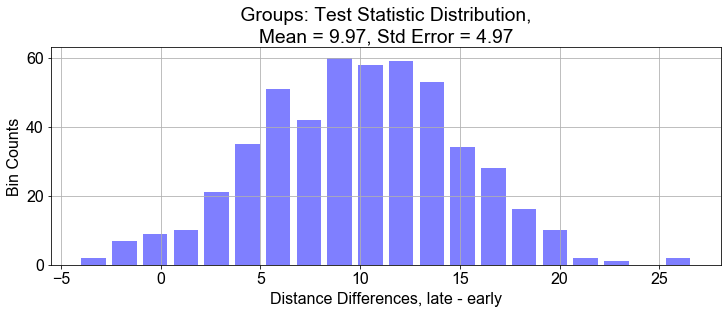

In [58]:
# Create two poulations, sample_distances for early and late sample_times.
# Then resample with replacement, taking 500 random draws from each population.
group_duration_short = sample_distances[sample_times < 5]
group_duration_long = sample_distances[sample_times > 5]
resample_short = np.random.choice(group_duration_short, size=500, replace=True)
resample_long = np.random.choice(group_duration_long, size=500, replace=True)

# Difference the resamples to compute a test statistic distribution, then compute its mean and stdev
test_statistic = resample_long - resample_short
effect_size = np.mean(test_statistic)
standard_error = np.std(test_statistic)

# Print and plot the results
print('Test Statistic: mean={:0.2f}, stdev={:0.2f}'.format(effect_size, standard_error))
fig = plot_test_statistic(test_statistic)

Notice again, the test statistic is the difference between a distance drawn from short duration trips and one drawn from long duration trips. The distribution of difference values is built up from differencing each point in the early time range with one from the late time range. The mean of the test statistic is not zero and tells us that there is on average a difference in distance traveled when comparing short and long duration trips. Again, we call this the 'effect size'. The time increase had an effect on distance traveled. The standard error of the test statistic distribution is not zero, so there is some spread in that distribution, or put another way, uncertainty in the size of the effect.

### Null Hypothesis
n this exercise, we formulate the null hypothesis as

> short and long time durations have no effect on total distance traveled.

We interpret the "zero effect size" to mean that if we shuffled samples between short and long times, so that two new samples each have a mix of short and long duration trips, and then compute the test statistic, on average it will be zero.

In [59]:
# Shuffle the time-ordered distances, then slice the result into two populations.
shuffle_bucket = np.concatenate((group_duration_short, group_duration_long))
np.random.shuffle(shuffle_bucket)
slice_index = len(shuffle_bucket)//2
shuffled_half1 = shuffle_bucket[0:slice_index]
shuffled_half2 = shuffle_bucket[slice_index:]

# Create new samples from each shuffled population, and compute the test statistic
resample_half1 = np.random.choice(shuffled_half1, size=500, replace=True)
resample_half2 = np.random.choice(shuffled_half2, size=500, replace=True)
test_statistic = resample_half2 - resample_half1

# Compute and print the effect size
effect_size = np.mean(test_statistic)
print('Test Statistic, after shuffling, mean = {}'.format(effect_size))

Test Statistic, after shuffling, mean = -0.36295901792875085


Notice that your effect size is not exactly zero because there is noise in the data. But the effect size is much closer to zero than before shuffling. Notice that if you rerun your code, which will generate a new shuffle, you will get slightly different results each time for the effect size, but np.abs(test_statistic) should be less than about 1.0, due to the noise, as opposed to the slope, which was about 2.0

### Visualizing Test Statistics
In this exercise, you will approach the null hypothesis by comparing the distribution of a test statistic arrived at from two different ways.

First, you will examine two "populations", grouped by early and late times, and computing the test statistic distribution. Second, shuffle the two populations, so the data is no longer time ordered, and each has a mix of early and late times, and then recompute the test statistic distribution.

In [60]:
def shuffle_and_split(sample1, sample2):
    shuffled = np.concatenate((sample1, sample2))
    np.random.shuffle( shuffled )
    half_length = len(shuffled)//2
    sample1 = shuffled[0:half_length]
    sample2 = shuffled[half_length+1:]
    return sample1, sample2

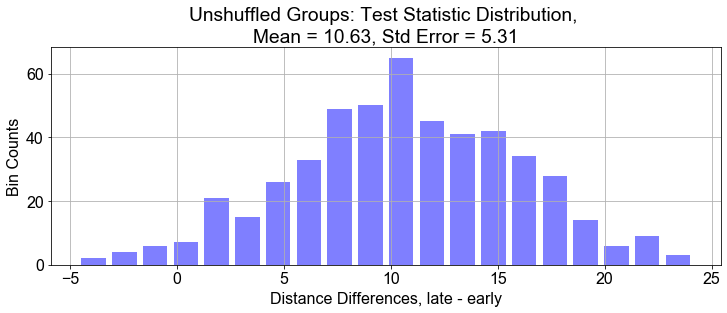

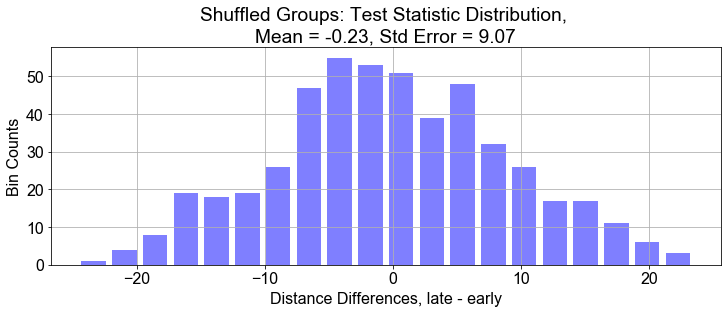

In [61]:
# From the unshuffled groups, compute the test statistic distribution
resample_short = np.random.choice(group_duration_short, size=500, replace=True)
resample_long = np.random.choice(group_duration_long, size=500, replace=True)
test_statistic_unshuffled = resample_long - resample_short

# Shuffle two populations, cut in half, and recompute the test statistic
shuffled_half1, shuffled_half2 = shuffle_and_split(group_duration_short, group_duration_long)
resample_half1 = np.random.choice(shuffled_half1, size=500, replace=True)
resample_half2 = np.random.choice(shuffled_half2, size=500, replace=True)
test_statistic_shuffled = resample_half2 - resample_half1

# Plot both the unshuffled and shuffled results and compare
fig = plot_test_statistic(test_statistic_unshuffled, label='Unshuffled')
fig = plot_test_statistic(test_statistic_shuffled, label='Shuffled')

Notice that after you shuffle, the effect size went almost to zero and the spread increased, as measured by the standard deviation of the sample statistic, aka the 'standard error'. So shuffling did indeed have an effect. The null hypothesis is disproven. Time ordering does in fact have a non-zero effect on distance traveled. Distance is correlated to time.

### Visualizing the P-Value
In this exercise, you will visualize the p-value, the chance that the effect (or "speed") we estimated, was the result of random variation in the sample. Your goal is to visualize this as the fraction of points in the shuffled test statistic distribution that fall to the right of the mean of the test statistic ("effect size") computed from the unshuffled samples.

In [65]:
def plot_test_stats_and_pvalue(test_statistic, shuffle_statistic):
    """
    Purpose: Plot the test statistic array as a histogram
    Args:
        test_statistic (np.array): an array of test statistic values, e.g. resample2 - resample1
        shuffle_statistic (np.array): an array of test statistic values, from shuffled resamples
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    t_mean = np.mean(test_statistic)
    t_std = np.std(test_statistic)
    t_min = np.min(test_statistic)
    t_max = np.max(test_statistic)
    effect_size = np.mean(test_statistic)
    p_value = len(shuffle_statistic[shuffle_statistic>=effect_size])/len(shuffle_statistic)
    
    bin_edges = np.linspace(-25, 25, 51)
    shuffle_opts = dict(rwidth=0.8, color='blue', alpha=0.35, label='Shuffled')
    test_opts = dict(rwidth=0.8, color='red', alpha=0.35, label='Unshuffled')
    fig, axis = plt.subplots(figsize=(12,4))
    plt.hist(test_statistic, bins=bin_edges, **test_opts)
    plt.hist(shuffle_statistic, bins=bin_edges, **shuffle_opts)
    axis.axvline(effect_size, color='black', label='Effect Size')
    axis.axvspan(effect_size, +25, alpha=0.10, color='black', label='p-value')
    axis.grid()
    
    axis.set_xlim(-25, +25)
    axis.set_ylabel("Bin Counts")
    axis.set_xlabel("Test Statistic Values")
    title_form = ("Test Statistic Distibution, \n"
                  "Effect Size = {:0.2f}, p-value = {:0.02f}")
    axis.set_title(title_form.format(effect_size, p_value))
    axis.legend(loc='upper left')
    plt.show()
    return fig

In [66]:
def compute_test_statistic(sample1, sample2):
    resample1 = np.random.choice(sample1, size=500, replace=True)
    resample2 = np.random.choice(sample2, size=500, replace=True)
    test_statistic = resample2 - resample1
    return test_statistic

The p-value is = 0.132


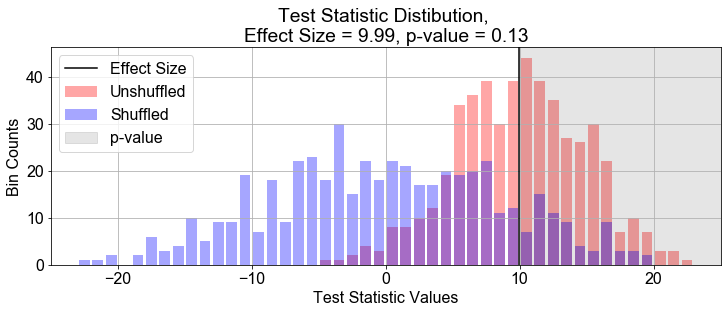

In [67]:
# Compute the test stat distribution and effect size for two population groups
test_statistic_unshuffled = compute_test_statistic(group_duration_short, group_duration_long)
effect_size = np.mean(test_statistic_unshuffled)

# Randomize the two populations, and recompute the test stat distribution
shuffled_half1, shuffled_half2 = shuffle_and_split(group_duration_short, group_duration_long)
test_statistic_shuffled = compute_test_statistic(shuffled_half1, shuffled_half2)

# Compute the p-value as the proportion of shuffled test stat values >= the effect size
condition = test_statistic_shuffled >= effect_size
p_value = len(test_statistic_shuffled[condition]) / len(test_statistic_shuffled)

# Print p-value and overplot the shuffled and unshuffled test statistic distributions
print("The p-value is = {}".format(p_value))
fig = plot_test_stats_and_pvalue(test_statistic_unshuffled, test_statistic_shuffled)

Note that the entire point of this is compute a p-value to quantify the chance that our estimate for speed could have been obtained by random chance. On the plot, the unshuffle test stats are the distribution of speed values estimated from time-ordered distances. The shuffled test stats are the distribution of speed values computed from randomizing unordered distances. Values of the shuffled stats to the right of the mean non-shuffled effect size line are those that both (1) could have both occured randomly and (2) are at least as big as the estimate you want to use for speed.